In [264]:
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats
from sklearn.linear_model import(
    HuberRegressor,
    LinearRegression,
    RANSACRegressor,
    TheilSenRegressor,
    ElasticNet,
    SGDRegressor,
    BayesianRidge,
    Ridge,
    )
from sklearn.ensemble import(
    RandomForestRegressor,
    GradientBoostingRegressor,
)
from plotly.offline import iplot
# from sklearn.linear_model import 
from sklearn.svm import SVR

In [265]:
# notebook configurations
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)
plt.style.use('dark_background')
scatter_color = 'cyan'

**Integrate data from different csv files**

In [266]:
happiness_2015 = pd.read_csv("../data/2015.csv")
happiness_2015.columns = ['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard Error', 'Economy', 'Family',
       'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia_Residual']
columns_2015 = ['Region', 'Standard Error']
new_dropped_2015 = happiness_2015.drop(columns_2015, axis=1)

In [267]:
happiness_2016 =  pd.read_csv("../data/2016.csv")
columns_2016 = ['Region', 'Lower Confidence Interval','Upper Confidence Interval' ]
dropped_2016 = happiness_2016.drop(columns_2016, axis=1)
dropped_2016.columns = ['Country', 'Happiness_Rank', 'Happiness_Score','Economy', 'Family',
       'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia_Residual']

In [268]:
happiness_2017 =  pd.read_csv("../data/2017.csv")
columns_2017 = ['Whisker.high','Whisker.low' ]
dropped_2017 = happiness_2017.drop(columns_2017, axis=1)
dropped_2017.columns = ['Country', 'Happiness_Rank', 'Happiness_Score','Economy', 'Family',
       'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia_Residual']

In [269]:
frames = [new_dropped_2015, dropped_2016, dropped_2017]
happiness = pd.concat(frames)
happiness

,Country,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Switzerland,1,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380
1,Iceland,2,7.561,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010
2,Denmark,3,7.527,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040
3,Norway,4,7.522,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310
4,Canada,5,7.427,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760
...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [270]:
earth = dict(type = 'choropleth', 
           locations = happiness['Country'],
           locationmode = 'country names',
           z = happiness['Happiness_Rank'], 
           text = happiness['Country'],
          colorscale = 'Viridis', reversescale = False)
layout = dict(title = 'Happiness Rank Across the World', 
             geo = dict(showframe = False, 
                       projection = {'type': 'kavrayskiy7'}))
choromap6 = go.Figure(data = [earth], layout=layout)
iplot(choromap6)

**Data Exploration**

In [271]:
happiness.isnull().sum()

Country              0
Happiness_Rank       0
Happiness_Score      0
Economy              0
Family               0
Health               0
Freedom              0
Trust                0
Generosity           0
Dystopia_Residual    0
dtype: int64

In [272]:
happiness.describe()

,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,78.829787,5.370728,0.927830,0.990347,0.579968,0.402828,0.175605,0.201426,2.092717
std,45.281408,1.136998,0.415584,0.318707,0.240161,0.150356,0.131909,0.133211,0.565772
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.000000,4.509000,0.605292,0.793000,0.402301,0.297615,0.075792,0.098303,1.737975
50%,79.000000,5.282500,0.995439,1.025665,0.630053,0.418347,0.139081,0.181624,2.094640
75%,118.000000,6.233750,1.252443,1.228745,0.768298,0.516850,0.249839,0.275505,2.455575
max,158.000000,7.587000,1.870766,1.610574,1.025250,0.669730,0.838075,0.819710,3.837720


In [273]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
Index: 470 entries, 0 to 154
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            470 non-null    object 
 1   Happiness_Rank     470 non-null    int64  
 2   Happiness_Score    470 non-null    float64
 3   Economy            470 non-null    float64
 4   Family             470 non-null    float64
 5   Health             470 non-null    float64
 6   Freedom            470 non-null    float64
 7   Trust              470 non-null    float64
 8   Generosity         470 non-null    float64
 9   Dystopia_Residual  470 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 40.4+ KB


In [274]:
happiness.columns.tolist()

['Country',
 'Happiness_Rank',
 'Happiness_Score',
 'Economy',
 'Family',
 'Health',
 'Freedom',
 'Trust',
 'Generosity',
 'Dystopia_Residual']

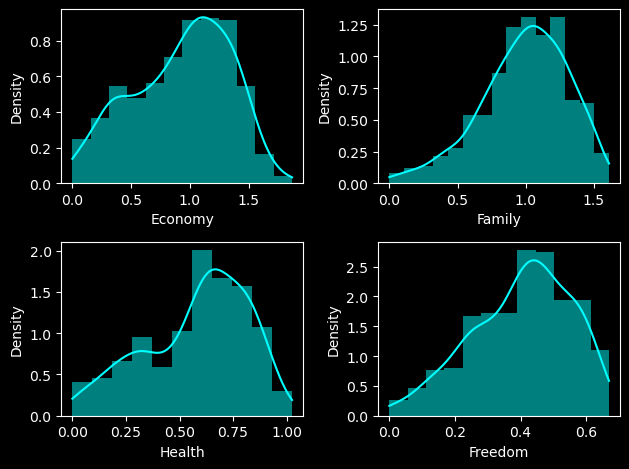

In [275]:
plt.subplot(2,2,1)
sns.histplot(happiness['Economy'], color="cyan", kde=True, stat="density", linewidth=0)
plt.subplot(2,2,2)
sns.histplot(happiness['Family'], color="cyan", kde=True, stat="density", linewidth=0)
plt.subplot(2,2,3)
sns.histplot(happiness['Health'], color="cyan", kde=True, stat="density", linewidth=0)
plt.subplot(2,2,4)
sns.histplot(happiness['Freedom'], color="cyan", kde=True, stat="density", linewidth=0)

plt.tight_layout()
plt.show()


fig = make_subplots(rows=2, cols=2)

fig.add_trace(go.Histogram(x=happiness['Economy'], name='Economy'), row=1, col=1)
fig.add_trace(go.Histogram(x=happiness['Family'], name='Family'), row=1, col=2)
fig.add_trace(go.Histogram(x=happiness['Health'], name='Health'), row=2, col=1)
fig.add_trace(go.Histogram(x=happiness['Freedom'], name='Freedom'), row=2, col=2)



fig.update_layout(title='Histograms of Economy, Family, Health, and Freedom',
                  barmode='overlay',  
                  width=1000, height=800,
                  xaxis=dict(title='Values'),
                  yaxis=dict(title='Density'),template='plotly_dark')

fig.show()



**Outliers Analysis**

In [276]:
subset_df = happiness[['Economy','Health','Family', 'Trust', 'Generosity']]

traces = []


for column in subset_df.columns:
    trace = go.Box(y=subset_df[column], name=column)
    traces.append(trace)

layout = go.Layout(title='Boxplot of Economy, Health, Family, Trust, and Generosity',
                   yaxis=dict(title='Values'))

fig = go.Figure(data=traces, layout=layout)
fig.update_layout(template='plotly_dark')

fig.show()


In [277]:
min=happiness.Trust.min()
q1=happiness.Trust.quantile(0.25)
q3=happiness.Trust.quantile(0.75)
IQR=q3-q1

In [278]:
LB=q1-(1.5*IQR)
UB=q3+(1.5*IQR)
print(LB)
print(UB)

-0.18527691532969454
0.5109081922161576


In [279]:
happiness=happiness[happiness["Trust"]<=0.50]
happiness=happiness[happiness["Generosity"]<=0.51]

In [280]:
# Q-Q plot to check the Normality 

fig = make_subplots(rows=2, cols=2)

fig.add_trace(go.Scatter(x=stats.probplot(happiness['Economy'])[0][0],
                         y=stats.probplot(happiness['Economy'])[0][1],
                         mode='markers', name='Economy'), row=1, col=1)

fig.add_trace(go.Scatter(x=stats.probplot(happiness['Family'])[0][0],
                         y=stats.probplot(happiness['Family'])[0][1],
                         mode='markers', name='Family'), row=1, col=2)

fig.add_trace(go.Scatter(x=stats.probplot(happiness['Freedom'])[0][0],
                         y=stats.probplot(happiness['Freedom'])[0][1],
                         mode='markers', name='Freedom'), row=2, col=1)

fig.add_trace(go.Scatter(x=stats.probplot(happiness['Health'])[0][0],
                         y=stats.probplot(happiness['Health'])[0][1],
                         mode='markers', name='Health'), row=2, col=2)

fig.update_layout(title='Q-Q Plots',width=1000, height=800,template='plotly_dark')

fig.show()


In [281]:
happiness.head()

,Country,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [282]:
fig = go.Figure(data=go.Splom(
                dimensions=[
                    dict(label='Economy', values=happiness['Economy']),
                    dict(label='Family', values=happiness['Family']),
                    dict(label='Health', values=happiness['Health']),
                    dict(label='Freedom', values=happiness['Freedom']),
                    dict(label='Trust', values=happiness['Trust']),
                    dict(label='Generosity', values=happiness['Generosity']),
                    dict(label='Happiness Score', values=happiness['Happiness_Score'])
                ],
                showupperhalf=True, 
                marker=dict(color='cyan', 
                            showscale=True, 
                            size=5,
                            line=dict(width=0.5, color='rgb(230,230,230)'))
                ))

fig.update_layout(title='Relation between features',
                  width=1300, height=1000,template='plotly_dark')

fig.show()

**Using Feature Engineering**
To enhance model accuracy 

In [283]:
happiness['Social_Support'] = happiness['Family'] + happiness['Economy']

print("After feature engineering:")
happiness.head()


After feature engineering:


,Country,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual,Social_Support
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2.74602
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2.70455
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2.68606
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2.78995
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2.64890


In [284]:
trace_social_support = go.Histogram(x=happiness['Social_Support'], name='Social Support', marker=dict(color='cyan'), opacity=0.6)
trace_family = go.Histogram(x=happiness['Family'], name='Family', marker=dict(color='grey'), opacity=0.6)
trace_trust = go.Histogram(x=happiness['Economy'], name='Economy', marker=dict(color='blue'), opacity=0.6)


layout = go.Layout(title='Social Support VS Family VS Economy',
                   xaxis=dict(title='Value'),
                   yaxis=dict(title='Density'),template="plotly_dark")

fig = go.Figure(data=[trace_social_support, trace_family, trace_trust], layout=layout)

fig.show()

In [285]:
data_cleaned = happiness.drop(columns=['Country'])
data_cleaned.head()

,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual,Social_Support
0,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2.74602
1,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2.70455
2,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2.68606
3,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2.78995
4,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2.64890


In [286]:
target = 'Happiness_Score'

correlations = {}

for column in data_cleaned.columns:
    if column != target:  
        corr = data_cleaned[column].corr(data_cleaned[target])
        correlations[column] = corr


for key, value in correlations.items():
    print(f"Correlation between {key} and {target}: {value}")

Correlation between Happiness_Rank and Happiness_Score: -0.9931274893344579
Correlation between Economy and Happiness_Score: 0.7818729853258476
Correlation between Family and Happiness_Score: 0.6296595658440398
Correlation between Health and Happiness_Score: 0.7440947592320886
Correlation between Freedom and Happiness_Score: 0.5663487557887547
Correlation between Trust and Happiness_Score: 0.3244405479973357
Correlation between Generosity and Happiness_Score: 0.241894141164536
Correlation between Dystopia_Residual and Happiness_Score: 0.4929156261134664
Correlation between Social_Support and Happiness_Score: 0.8029377865508027


In [287]:
corr_matrix = happiness.corr(numeric_only=True)

heatmap_trace = go.Heatmap(z=corr_matrix.values,
                           x=corr_matrix.columns,
                           y=corr_matrix.columns,
                           colorscale='RdBu',
                           colorbar=dict(title='Correlation'),
                           hoverinfo='text')

layout = go.Layout(title='Correlation Heatmap',
                   xaxis=dict(title='Features'),
                   yaxis=dict(title='Features'),
                   template='plotly_dark') 

annotations = []
for i, row in enumerate(corr_matrix.values):
    for j, value in enumerate(row):
        annotations.append(
            dict(
                x=corr_matrix.columns[j],
                y=corr_matrix.columns[i],
                text=str(round(value, 2)),
                font=dict(color='white' if abs(value) > 0.5 else 'black'),  
                showarrow=False
            )
        )

layout.update(annotations=annotations)

fig = go.Figure(data=[heatmap_trace], layout=layout)

fig.show()

In [288]:
scatter_trace = go.Scatter(x=data_cleaned['Economy'],
                           y=data_cleaned['Happiness_Score'],
                           mode='markers',
                           marker=dict(color='cyan', opacity=0.5),
                           name='Relationship between Economy and Happiness Score')

layout = go.Layout(title='Relationship between Economy and Happiness Score',
                   xaxis=dict(title='Economy'),
                   yaxis=dict(title='Happiness Score'),
                   template='plotly_dark')  

fig = go.Figure(data=[scatter_trace], layout=layout)

fig.show()

**Choose features**

In [289]:
X = data_cleaned[['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Social_Support']]
y = data_cleaned['Happiness_Score']

In [290]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()

r_squared_values = []
r_squared_adjusted_values = []

for feature in X.columns:
    model.fit(X[[feature]], y)
    
    y_pred_train = model.predict(X[[feature]])
    
    r_squared = r2_score(y, y_pred_train)
    
    num_features = 1
    
    num_samples = len(X)
    
    r_squared_adjusted = 1 - (1 - r_squared) * (num_samples - 1) / (num_samples - num_features - 1)
    
    r_squared_values.append(r_squared)
    r_squared_adjusted_values.append(r_squared_adjusted)

for feature, r_squared, r_squared_adjusted in zip(X.columns, r_squared_values, r_squared_adjusted_values):
    print(f"Feature: {feature}, R-squared: {r_squared}, R-squared adjusted: {r_squared_adjusted}")


Feature: Economy, R-squared: 0.6113253651823527, R-squared adjusted: 0.6104616437716468
Feature: Family, R-squared: 0.39647116885890454, R-squared adjusted: 0.39512999367859103
Feature: Health, R-squared: 0.55367701071666, R-squared adjusted: 0.5526851818515859
Feature: Freedom, R-squared: 0.3207509131834704, R-squared adjusted: 0.31924147076832254
Feature: Trust, R-squared: 0.10526166918481139, R-squared adjusted: 0.10327336178299995
Feature: Generosity, R-squared: 0.058512775529728334, R-squared adjusted: 0.056420581697572136
Feature: Social_Support, R-squared: 0.6447090890711025, R-squared adjusted: 0.6439195537134828


In [291]:
X = data_cleaned[['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Social_Support']]
y = data_cleaned['Happiness_Score']

**Build Regression Model**

In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_names = [
     'SVR',
     'LinearRegression',
     'Huber',
     'RANSAC',
     'BayesianRidge',
     'TheilSen',
     'Ridge'
]


models = [
     SVR(degree=7, kernel='rbf', C=10, gamma=0.1),
     LinearRegression(),
     HuberRegressor(alpha=0.0001, max_iter=10000),
     RANSACRegressor(),
     BayesianRidge(alpha_1=0.1, lambda_1=0.1),
     TheilSenRegressor(random_state=0),
     Ridge(alpha=1.0),
]

models_results = []
model_predict_results = []
for model in models:
     fitted_model = model.fit(X_train, y_train)
     
     y_pred = model.predict(X_test)
     model_predict_results.append(y_pred)

     mae = mean_absolute_error(y_test, y_pred)
     mse = mean_squared_error(y_test, y_pred)
     r2e = np.sqrt(mean_squared_error(y_test, y_pred))
     r2 = r2_score(y_test, y_pred)

     models_results.append([r2,mae,mse,r2e])


**Evaluate The Model**

In [293]:
models_df = pd.DataFrame({
    'Model':model_names,
    'Coefficient of determination (R2)':[model[0] for model in models_results],
    'Mean Absolute Error':[model[1] for model in models_results],
    'Mean Square Error':[model[2] for model in models_results],
    'Root Mean Square Error':[model[3] for model in models_results],
})
models_df

,Model,Coefficient of determination (R2),Mean Absolute Error,Mean Square Error,Root Mean Square Error
0,SVR,0.847972,0.371206,0.223119,0.472355
1,LinearRegression,0.827468,0.400349,0.253211,0.503201
2,Huber,0.828742,0.398967,0.251341,0.501339
3,RANSAC,0.786111,0.439251,0.313906,0.560273
4,BayesianRidge,0.827152,0.400124,0.253675,0.503662
5,TheilSen,0.830199,0.397888,0.249202,0.499202
6,Ridge,0.825184,0.401266,0.256563,0.506520


In [294]:
trace_r2 = go.Bar(x=models_df['Model'], y=models_df['Coefficient of determination (R2)'], name='R2')
trace_mae = go.Bar(x=models_df['Model'], y=models_df['Mean Absolute Error'], name='Mean Absolute Error')
trace_mse = go.Bar(x=models_df['Model'], y=models_df['Mean Square Error'], name='Mean Square Error')
trace_rmse = go.Bar(x=models_df['Model'], y=models_df['Root Mean Square Error'], name='Root Mean Square Error')


data = [trace_r2, trace_mae, trace_mse, trace_rmse]

layout = go.Layout(title='Model Evaluation Metrics',
                   xaxis=dict(title='Models realations',tickangle=0),
                   yaxis=dict(title='Value'), template="plotly_dark")

fig = go.Figure(data=data, layout=layout)

fig.show()

In [295]:
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
154,3.303,3.584449
43,6.003,5.770739
37,6.168,6.237470
33,6.403,6.545517
2,7.501,6.592495
...,...,...
31,6.485,6.260753
155,3.006,4.519977
119,4.362,4.636743
28,6.575,6.566279


In [296]:
actual_values = reg_model_diff['Actual value']
predicted_values = reg_model_diff['Predicted value']

actual_trace = go.Scatter(x=actual_values, y=actual_values, 
                          mode='markers', marker=dict(color='blue', opacity=0.8),
                          name='Actual')

predicted_trace = go.Scatter(x=actual_values, y=predicted_values, 
                             mode='markers', marker=dict(color='red', opacity=0.8),
                             name='Predicted')

layout = go.Layout(title='Actual vs Predicted',
                   xaxis=dict(title='Actual'),
                   yaxis=dict(title='Predicted'),
                   template='plotly_dark')

fig = go.Figure(data=[actual_trace, predicted_trace], layout=layout)

fig.show()

In [297]:
for y_pred, model_name in zip(model_predict_results, model_names):
    residuals = y_test - y_pred

    scatter_trace = go.Scatter(x=y_test, y=y_pred, mode='markers', marker=dict(color='cyan'), name='Actual vs. Predicted')
    residuals_trace = go.Scatter(x=y_test, y=residuals, mode='markers', marker=dict(color='red', opacity=0.3), name='Residuals')
    regression_trace = go.Scatter(x=y_test, y=y_test, mode='lines', line=dict(color='white', dash='dash'), name='Perfect Prediction')

    layout = go.Layout(title=model_name,
                    xaxis=dict(title="Actual Happiness Score"),
                    yaxis=dict(title="Predicted Happiness Score"),
                    template="plotly_dark")

    fig = go.Figure(data=[scatter_trace, residuals_trace, regression_trace], layout=layout)
    fig.show()


**Testing for Overfitting**

**Overfiting Causes**:
    1. Variables are alot for the number of observations
    2. Low error rates for training set compared to test set

In [298]:
from sklearn.model_selection import cross_val_score

num_folds = 5

models_results_cv = []

for model, model_name in zip(models, model_names):
    cv_scores = cross_val_score(model, X, y, cv=num_folds, scoring='neg_mean_squared_error')

    cv_rmse = np.sqrt(-cv_scores)
    mean_rmse = np.mean(cv_rmse)
    std_rmse = np.std(cv_rmse)

    models_results_cv.append({'Model': model_name, 'Mean RMSE': mean_rmse, 'Std RMSE': std_rmse})


pd.DataFrame({
    'Models': model_names,
    'Mean RMSE': [result['Mean RMSE'] for result in models_results_cv],
    'Std RMSE': [result['Std RMSE'] for result in models_results_cv],
})



,Models,Mean RMSE,Std RMSE
0,SVR,0.627050,0.108409
1,LinearRegression,0.620536,0.115525
2,Huber,0.613314,0.109407
3,RANSAC,0.623468,0.093875
4,BayesianRidge,0.620273,0.115360
5,TheilSen,0.615188,0.106139
6,Ridge,0.620757,0.116504


In [299]:
train_rmse = []
test_rmse = []

for model in models:
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

for i, model_name in enumerate(model_names):
    print("Model: {}, Train RMSE: {:.2f}, Test RMSE: {:.2f}".format(model_name, train_rmse[i], test_rmse[i]))

Model: SVR, Train RMSE: 0.57, Test RMSE: 0.47
Model: LinearRegression, Train RMSE: 0.59, Test RMSE: 0.50
Model: Huber, Train RMSE: 0.59, Test RMSE: 0.50
Model: RANSAC, Train RMSE: 0.61, Test RMSE: 0.52
Model: BayesianRidge, Train RMSE: 0.59, Test RMSE: 0.50
Model: TheilSen, Train RMSE: 0.59, Test RMSE: 0.50
Model: Ridge, Train RMSE: 0.59, Test RMSE: 0.51


**Model Using OLS**

In [300]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Happiness_Score ~ Economy + Family + Health + Freedom + Trust + Social_Support', data=data_cleaned).fit()

* R-squared and adjusted R-squared values are approximately the same which means:
1. **All Features Are Equally Important:** It's possible that all the features in your model are equally important in explaining the variance in the target variable. 
2. **High Correlation Among Features:** If the features in your model are highly correlated with each other, adding more features may not substantially improve the model's explanatory power. As a result, both R2 and R2_adj will be similar because the penalty term in R2_adj won't significantly affect the adjustment.
3. **Appropriate Model Complexity:** The model might have reached an appropriate level of complexity where adding more features doesn't lead to overfitting or underfitting. 
4. **No Overfitting:** If there's no overfitting in your model.

In [301]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     274.1
Date:                Thu, 09 May 2024   Prob (F-statistic):          1.58e-133
Time:                        05:52:17   Log-Likelihood:                -381.00
No. Observations:                 452   AIC:                             774.0
Df Residuals:                     446   BIC:                             798.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.2662      0.098     23.218      0.000       2.074       2.458
Economy            0.4788      0.095      5.046      0.000       0.292       0.665
Family             0.0521      0.092      0.566      0.572      -0.129       0.233
Health             1.3064      0.183      7.131      0.000       0.946       1.666
Freedom            1.9120      0.210      9.100      0.000       1.499       2.325
Trust              0.3834      0.246      1.559      0.120      -0.100       0.867
Social_Support     0.5310      0.042     12.509      0.000       0.448       0.614
==============================================================================
Omnibus:                        2.852   Durbin-Watson:                   1.398
Prob(Omnibus):                  0.240   Jarque-Bera (JB):                2.617
Skew:                          -0.171   Prob(JB):                        0.270
Kurtosis:                       3.147   Cond. No.                     8.88e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.37e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

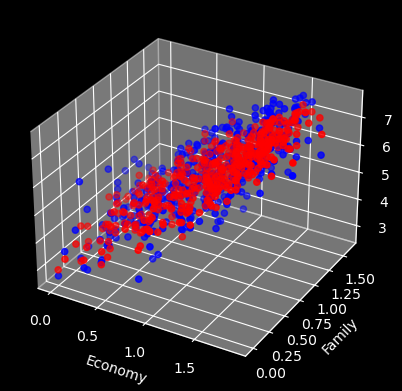

In [302]:
X = data_cleaned[['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Social_Support']]

y_pred = model.predict(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X['Economy'], X['Family'], y_pred, c='r', marker='o')
ax.scatter(X['Economy'], X['Family'], y, c='blue', marker='o')

ax.set_xlabel('Economy')
ax.set_ylabel('Family')
ax.set_zlabel('Happiness Score')

plt.show()

In [303]:
ssr = model.mse_model * model.df_model  
sse = model.mse_resid * model.df_resid  

df_reg = model.df_model
df_error = model.df_resid

msr = ssr / df_reg
mse = sse / df_error

f_statistic = msr / mse

anova_table = sm.stats.anova_lm(model, typ=2)

anova_table['PR(>F)'] = anova_table['PR(>F)'].apply(lambda x: '{:.15f}'.format(x))
print(anova_table)

                    sum_sq     df           F             PR(>F)
Economy           8.155436    1.0   25.465923  0.000000656828329
Family            0.102470    1.0    0.319969  0.571910843312174
Health           16.282872    1.0   50.844411  0.000000000004059
Freedom          26.520111    1.0   82.810912  0.000000000000000
Trust             0.777968    1.0    2.429261  0.119798332068794
Social_Support   50.114488    1.0  156.486012  0.000000000000000
Residual        142.831053  446.0         NaN                nan


**Ploynomial Regression**

In [304]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True)

X1_poly_train=poly.fit_transform(X_train)
X1_poly_test=poly.fit_transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X1_poly_train,y_train)
r2 = poly_model.score(X1_poly_test,y_test)

print('R-saquared=',r2)

R-saquared= 0.8380894487288456


**Predict Data**

In [305]:
new_data_point = np.array([[0.91851 , 1.00232, 0.73545, 0.33457 ,0.05327, 1.92083]])

predicted_happiness_score = models[3].predict(new_data_point)

print("Predicted Happiness Score:", predicted_happiness_score[0])
s

Predicted Happiness Score: 5.508450128642427
